

---

# PRACTICA FINAL
José María Sánchez Guerrero
---



## Para ejecutar en colab

In [1]:
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import drive

drive.mount('/content/drive')
path = '/content/drive/My Drive/Colab Notebooks/'

Mounted at /content/drive


In [2]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

# Read Data

In [3]:
## DESCOMENTAR PARA DESCARGAR LOS DATOS##
#from tensorflow.examples.tutorials.mnist import input_data

#data = input_data.read_data_sets('data', source_url='http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/')

In [4]:
import mnist_reader
x_train, y_train = mnist_reader.load_mnist('data', kind='train')
x_test, y_test = mnist_reader.load_mnist('data', kind='t10k')

# Init variables

In [5]:
batch_size = 128
num_classes = 10
epochs = 30

# input image dimensions
img_rows, img_cols = 28, 28

# Preprocessing data

In [6]:
import keras
from keras import backend as K
import numpy as np

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# Algorithms

## Clasic classifiers

              precision    recall  f1-score   support

           0       0.45      0.95      0.61      1000
           1       1.00      0.95      0.97      1000
           2       0.85      0.69      0.76      1000
           3       0.93      0.85      0.88      1000
           4       0.84      0.71      0.77      1000
           5       0.99      0.93      0.96      1000
           6       0.87      0.42      0.57      1000
           7       0.94      0.94      0.94      1000
           8       0.99      0.95      0.97      1000
           9       0.97      0.94      0.95      1000

    accuracy                           0.83     10000
   macro avg       0.88      0.83      0.84     10000
weighted avg       0.88      0.83      0.84     10000

SCORE:  0.8326


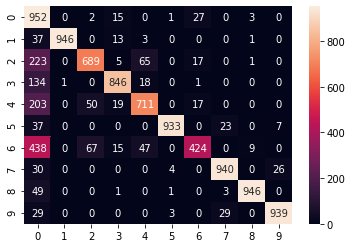

In [20]:
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=50)
rf.fit(x_train.reshape(x_train.shape[0], img_cols*img_rows), y_train)

# Calculo de las predicciones mediante validacion cruzada (5-folds)
y_pred = rf.predict(x_test.reshape(x_test.shape[0], img_cols*img_rows))

print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))
print("SCORE: ", accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

# Matriz de confusion de los resultados
confusion_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

sns.heatmap(confusion_matrix, annot = True, fmt='g')

              precision    recall  f1-score   support

           0       0.79      0.85      0.82      1000
           1       0.99      0.97      0.98      1000
           2       0.79      0.82      0.81      1000
           3       0.88      0.88      0.88      1000
           4       0.84      0.78      0.81      1000
           5       0.93      0.97      0.95      1000
           6       0.72      0.69      0.70      1000
           7       0.95      0.95      0.95      1000
           8       0.97      0.95      0.96      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

SCORE:  0.8808


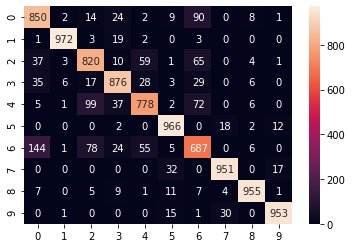

In [8]:
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svc = SVC(C=10, kernel='poly')
svc.fit(x_train.reshape(x_train.shape[0], img_cols*img_rows), y_train.argmax(axis=1))

# Calculo de las predicciones mediante validacion cruzada (5-folds)
y_pred = svc.predict(x_test.reshape(x_test.shape[0], img_cols*img_rows))

print(classification_report(y_test.argmax(axis=1), y_pred))
print("SCORE: ", accuracy_score(y_test.argmax(axis=1), y_pred))

# Matriz de confusion de los resultados
confusion_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred)

sns.heatmap(confusion_matrix, annot = True, fmt='g')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://sci

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1000
           1       0.98      0.96      0.97      1000
           2       0.76      0.80      0.78      1000
           3       0.85      0.90      0.87      1000
           4       0.77      0.80      0.79      1000
           5       0.96      0.95      0.96      1000
           6       0.68      0.59      0.64      1000
           7       0.93      0.95      0.94      1000
           8       0.94      0.95      0.95      1000
           9       0.96      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

SCORE:  0.8679


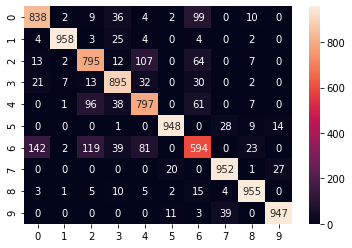

In [16]:
import seaborn as sns
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

RndForestClf = RandomForestClassifier()

estimators = [
    ('lr', LogisticRegression()),
    ('RndForestClf', RndForestClf),
    ('svr', LinearSVC() )
]

StackingClf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
StackingClf.fit(x_train.reshape(x_train.shape[0], img_cols*img_rows), y_train.argmax(axis=1))

# Calculo de las predicciones mediante validacion cruzada (5-folds)
y_pred = StackingClf.predict(x_test.reshape(x_test.shape[0], img_cols*img_rows))

print(classification_report(y_test.argmax(axis=1), y_pred))
print("SCORE: ", accuracy_score(y_test.argmax(axis=1), y_pred))

# Matriz de confusion de los resultados
confusion_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred)

sns.heatmap(confusion_matrix, annot = True, fmt='g')

## Deep Learning aproximation

In [19]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

model.fit(x_train, y_train,
          steps_per_epoch=int( np.ceil(len(x_train)/batch_size)),
          epochs=40,
          verbose=1,
          validation_data=(x_test, y_test),
          validation_steps=int( np.ceil(len(x_test)/batch_size))
          )
          
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)              

## Pre-trained Network - ResNet50

In [15]:
import keras.utils as np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


# Expandimos las imagenes para que sean de 32x32, que es lo que admite resnet50
x_train_prep = x_train.reshape(-1,28,28)
x_test_prep = x_test.reshape(-1,28,28)

new_Cols = np.zeros([28,2])
new_Rows = np.zeros([2,32])
expand_X_train = np.zeros([len(x_train_prep),32,32])
expand_X_test = np.zeros([len(x_test_prep),32,32])

for i in range(len(x_train)):
    aux = np.c_[new_Cols, x_train_prep[i]]
    aux = np.c_[aux, new_Cols]
    aux = np.r_[new_Rows, aux]
    expand_X_train[i] = np.r_[aux, new_Rows]
    
for i in range(len(x_test)):
    aux = np.c_[new_Cols, x_test_prep[i]]
    aux = np.c_[aux, new_Cols]
    aux = np.r_[new_Rows, aux]
    expand_X_test[i] = np.r_[aux, new_Rows]

new_X_train = np.zeros([len(x_train),32,32,3])
new_X_test = np.zeros([len(x_test),32,32,3])

new_X_train[:,:,:,] = expand_X_train.reshape(-1,32,32,1)
new_X_test[:,:,:,] = expand_X_test.reshape(-1,32,32,1)



# Definir el modelo ResNet50 (preentrenado en ImageNet y sin la última capa).
model = Sequential()
model.add(ResNet50(include_top=False,
                   weights='imagenet',
                   input_tensor=None,
                   input_shape=(32,32,3),
                   pooling='avg',classes=10))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))


# Compilar el modelo
model.compile(optimizer=keras.optimizers.Adam(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
red_lr= ReduceLROnPlateau(monitor='val_accuracy',
                          patience=3,
                          verbose=1,
                          factor=0.7)
epochs=20

model.summary()

model.fit(new_X_train,y_train,
          batch_size = batch_size,
          epochs = epochs,
          validation_data = (new_X_test,y_test),
          verbose = 1,
          callbacks=[red_lr])  
          
score = model.evaluate(new_X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten_3 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                131136    
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                650       
Total params: 23,719,754
Trainable params: 23,666,506
Non-trainable params: 53,248
_____________________________________